In [1]:
import pandas as pd

In [2]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# 데이터 합치기 
red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0


In [8]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

In [11]:
wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [9]:
import plotly.express as px

fig = px.histogram(wine, x='quality')
fig.show()

### 레드/화이트 와인별로 등급 histogram 확인

In [12]:
fig = px.histogram(wine, x='quality', color='color')
fig.show()

## 레드 와인/화이트 와인 분류기

### # 라벨 분리

In [13]:
X = wine.drop(['color'], axis=1) 
y = wine['color']

In [15]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### 훈련용 / 테스트용 분리

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [19]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3913, 1284]))

### 훈련/테스트 데이터가 레드/화이트 와인에 따라 어느 정도로 구분되었을지 확인

In [20]:
import plotly.graph_objects as go 

fig = go.Figure()
fig.add_trace(go.Histogram(x=X_train['quality'], name='Train'))
fig.add_trace(go.Histogram(x=X_test['quality'], name='Test'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.7)
fig.show()

### 결정나무 훈련

In [21]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

### 학습결과

In [22]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

In [24]:
accuracy_score(y_train, y_pred_tr)

0.9553588608812776

In [25]:
accuracy_score(y_test, y_pred_test)

0.9569230769230769

### boxplot

In [26]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [28]:
fig = go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name='quality'))
fig.show()

```
* 컬럼 간 범위가 클 경우 제대로 학습이 안될 수 있음
    --> MinMaxScaler와 StandardScaler 이용
```

### MinMaxScaler와 StandardScaler 사용

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

In [30]:
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

In [31]:
X_mms

array([[0.29752066, 0.41333333, 0.        , ..., 0.19101124, 0.20289855,
        0.33333333],
       [0.33057851, 0.53333333, 0.        , ..., 0.25842697, 0.26086957,
        0.33333333],
       [0.33057851, 0.45333333, 0.02409639, ..., 0.24157303, 0.26086957,
        0.33333333],
       ...,
       [0.2231405 , 0.10666667, 0.11445783, ..., 0.13483146, 0.20289855,
        0.5       ],
       [0.14049587, 0.14      , 0.18072289, ..., 0.08988764, 0.69565217,
        0.66666667],
       [0.18181818, 0.08666667, 0.22891566, ..., 0.05617978, 0.55072464,
        0.5       ]])

In [33]:
def px_box(target_df):
    fig = go.Figure()
    fig.add_trace(go.Box(y=target_df['fixed acidity'], name='fixed acidity'))
    fig.add_trace(go.Box(y=target_df['chlorides'], name='chlorides'))
    fig.add_trace(go.Box(y=target_df['quality'], name='quality'))

    fig.update_layout(barmode='overlay')
    fig.update_traces(opacity=0.7)
    fig.show()

In [35]:
px_box(X_mms_pd)

```
컬럼들의 최대/최소 범위가 각각 다르고, 평균 분산이 각각 다름
특성의 편향 문제는 최적 모델 찾는데 방해 될 수 있음
```

In [36]:
px_box(X_mms_pd)

```
최대 최소값을 1과 0으로 맞춤 
```

### MinMaxScaler를 적용해서 다시 학습

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_mms_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.9553588608812776
Test Acc:  0.9569230769230769


```
결정나무에서는 이런 전처리는 거의 효과 없음
```

### StandardScaler를 적용

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ss_pd, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

### 레드와인과 화이트와인을 구분하는 중요 특성?

In [40]:
dict(zip(X_train.columns, wine_tree.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.2423036054966077,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033923,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

## 와인 맛에 대한 분류 

### quality 컬럼 이진화

In [43]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1.0,0.0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1.0,0.0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1.0,1.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1.0,1.0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1.0,0.0


### 레드/화이트 와인 분류와 동일하게 훈련/테스트 구분 > 결정나무 훈련

In [44]:
X = wine.drop(['taste'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [45]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  1.0
Test Acc:  1.0


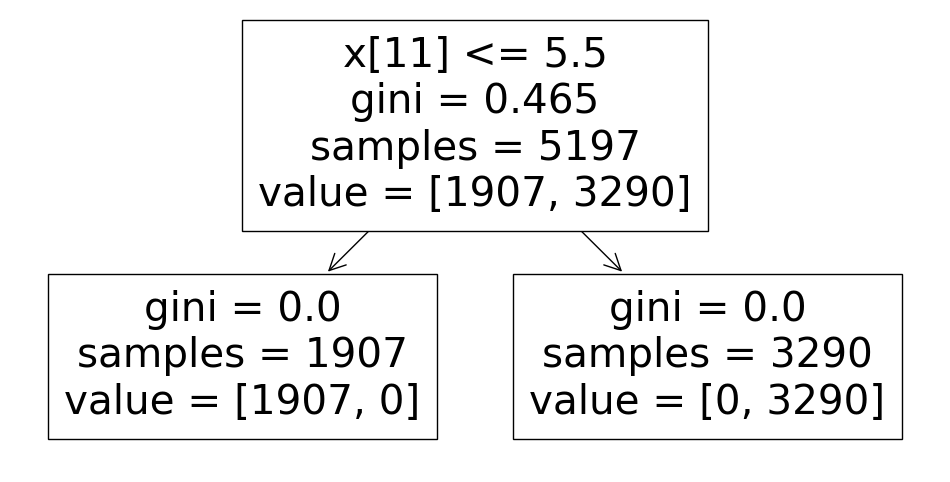

In [51]:
import matplotlib.pylab as plt
import sklearn.tree as tree

plt.figure(figsize=(12, 6))
tree.plot_tree(wine_tree);

```
quality 컬럼으로 taste 컬럼을 만들었으니 quality 컬럼은 제거해야함 !!! 
```

### 다시 훈련

In [52]:
# quality 도 같이 드랍 

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [53]:
y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7294593034442948
Test Acc:  0.7161538461538461


### 어떤 와인을 "맛있다"고 표현할 수 있나? 

In [58]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color'],
      dtype='object')

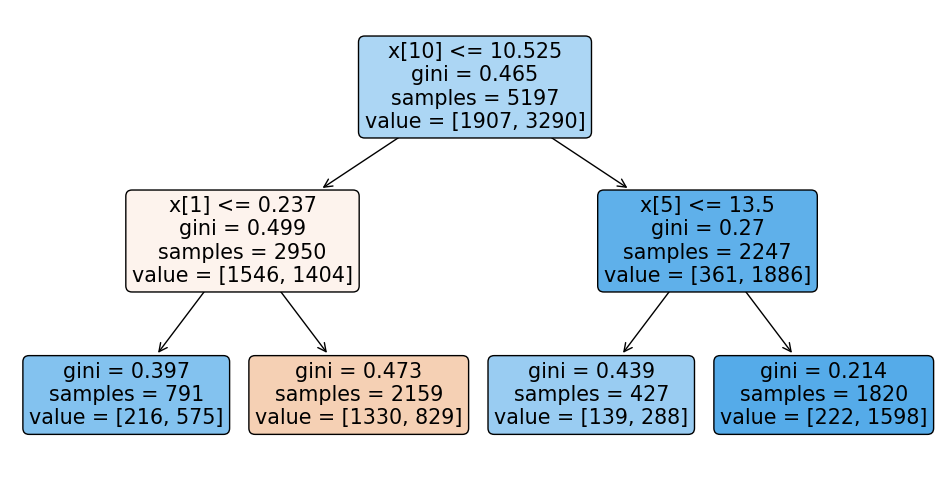

In [57]:
plt.figure(figsize=(12, 6))
tree.plot_tree(wine_tree, filled=True, rounded=True)
plt.show()

### 결론

```
    alcohol > 10.525 -> free sulfur dioxide > 13.5 
```